## Importing the libraries

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## DataCleaning

In [2]:
dataset_path = 'students.csv'
df = pd.read_csv(dataset_path)
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")
#----------------------------------------
df.dropna()
df.dropna(axis=1)
#df["Hours Studied"].fillna(df["Hours Studied"].mean(),inplace=True)
#df["Extracurricular Activities"].fillna(df["Extracurricular Activities"].mode()[0],inplace=True)
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


## Variables Encoding 

In [3]:
#one hot encode
df = pd.get_dummies(df, drop_first=True)
#--------------------------------------------------
# move y column to last coloumn
column_to_move = df.pop("Performance Index")
df.insert(len(df.columns), "Performance Index", column_to_move)
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes,Performance Index
0,7,99,9,1,True,91.0
1,4,82,4,2,False,65.0
2,8,51,7,2,True,45.0
3,5,52,5,2,True,36.0
4,7,75,8,5,False,66.0
...,...,...,...,...,...,...
9995,1,49,4,2,True,23.0
9996,7,64,8,5,True,58.0
9997,6,83,8,5,True,74.0
9998,9,97,7,0,True,95.0


## Splitting the dataset

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

## Feature Selection

In [6]:
correalation_matrix=df.corr()
correalation_with_charge=correalation_matrix["Performance Index"].sort_values(ascending=False)
correalation_with_charge

Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Extracurricular Activities_Yes      0.024525
Name: Performance Index, dtype: float64

## Training the Multiple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Tests

In [8]:
y_predictions = regressor.predict(X_test)

## Evaluating Model Performance

In [9]:
r2 = r2_score(y_test, y_predictions)

print(f"R-squared Value: {r2}")


R-squared Value: 0.9884855999665683


##  Visualization of Regression Results


Text(0, 0.5, 'y_predictions')

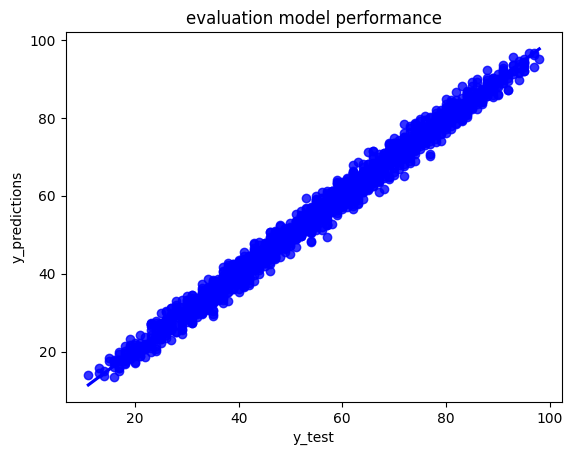

In [10]:
import seaborn as sns
sns.regplot(x=y_test, y=y_predictions, ci=None, color="b")
plt.title("evaluation model performance")
plt.xlabel("y_test")
plt.ylabel("y_predictions")
